In [1]:
import pandas as pd
import numpy as np
import inflect
p = inflect.engine()
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# build a simple linear regression in python
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.style.use('seaborn')
sns.set(style="white")
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from math import exp
from scipy import stats
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
import warnings
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
pd.set_option("display.max_columns", None)

In [2]:
df = pd.read_csv('datasets_1358_30676_Players.csv')

In [3]:
df

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky
...,...,...,...,...,...,...,...,...
3917,3917,Troy Williams,198.0,97.0,South Carolina State University,1969.0,Columbia,South Carolina
3918,3918,Kyle Wiltjer,208.0,108.0,Gonzaga University,1992.0,Portland,Oregon
3919,3919,Stephen Zimmerman,213.0,108.0,"University of Nevada, Las Vegas",1996.0,Hendersonville,Tennessee
3920,3920,Paul Zipser,203.0,97.0,NaN,1994.0,Heidelberg,Germany


In [4]:
df_stat = pd.read_csv('Seasons_Stats.csv')

In [5]:
df_stat

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,NaN,0.467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,3.6,3.5,NaN,NaN,NaN,NaN,NaN,NaN,144.0,516.0,0.279,NaN,NaN,NaN,144.0,516.0,0.279,0.279,170.0,241.0,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,NaN,0.387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN,NaN,102.0,274.0,0.372,NaN,NaN,NaN,102.0,274.0,0.372,0.372,75.0,106.0,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,NaN,0.259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,2.8,3.6,NaN,NaN,NaN,NaN,NaN,NaN,174.0,499.0,0.349,NaN,NaN,NaN,174.0,499.0,0.349,0.349,90.0,129.0,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,NaN,0.395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,22.0,86.0,0.256,NaN,NaN,NaN,22.0,86.0,0.256,0.256,19.0,34.0,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,NaN,0.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,21.0,82.0,0.256,NaN,NaN,NaN,21.0,82.0,0.256,0.256,17.0,31.0,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,0.604,0.002,0.442,8.6,17.3,12.9,9.1,1.8,3.0,10.9,15.5,NaN,3.4,2.2,5.6,0.157,NaN,-0.2,2.3,2.1,1.8,253.0,443.0,0.571,0.0,1.0,0.000,253.0,442.0,0.572,0.571,133.0,196.0,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,0.508,0.006,0.247,9.2,17.0,13.2,12.2,0.7,3.3,10.2,16.5,NaN,0.5,0.6,1.0,0.094,NaN,-3.2,0.8,-2.5,-0.1,78.0,158.0,0.494,0.0,1.0,0.000,78.0,157.0,0.497,0.494,22.0,39.0,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,0.346,0.000,0.161,10.8,24.9,17.6,5.3,0.9,3.7,8.3,14.8,NaN,-0.1,0.1,0.0,-0.005,NaN,-7.8,0.4,-7.3,-0.1,10.0,31.0,0.323,0.0,0.0,NaN,10.0,31.0,0.323,0.323,3.0,5.0,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,0.503,0.448,0.181,1.9,14.2,8.0,6.1,0.9,1.5,14.4,14.4,NaN,-0.3,0.8,0.5,0.030,NaN,-3.6,-0.1,-3.7,-0.4,88.0,221.0,0.398,33.0,99.0,0.333,55.0,122.0,0.451,0.473,31.0,40.0,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


In [6]:
df = pd.read_csv('all_seasons.csv')

In [7]:
df.season = df.season.map(lambda x : x[:4])

In [8]:
df.isna().sum()

Unnamed: 0           0
player_name          0
team_abbreviation    0
age                  0
player_height        0
player_weight        0
college              0
country              0
draft_year           0
draft_round          0
draft_number         0
gp                   0
pts                  0
reb                  0
ast                  0
net_rating           0
oreb_pct             0
dreb_pct             0
usg_pct              0
ts_pct               0
ast_pct              0
season               0
dtype: int64

In [9]:
df.set_index('player_name', inplace=True)

In [10]:
df_stat.set_index(['Player'], inplace=True)

In [11]:
df_stat.drop('Unnamed: 0', axis=1,inplace=True)

In [12]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [13]:
bball = df.join(df_stat, how='left')

In [14]:
bball= bball[bball.PTS >=0]

In [15]:
bball.reset_index(inplace=True)

In [16]:
bball.drop(['gp', 'pts', 'reb', 'ast', 'net_rating','oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season','college',"Tm",'draft_year','index','country','draft_number','FGA','age'], axis=1, inplace=True)

In [17]:
missing_titles = []
complete_titles = []
for i in bball.columns:
    if bball[i].isna().sum() != 0:
        missing_titles.append(i)
    else:
        complete_titles.append(i)

In [18]:
missing_titles

['GS',
 'PER',
 'TS%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'USG%',
 'blanl',
 'WS/48',
 'blank2',
 'OBPM',
 'DBPM',
 'BPM',
 'VORP',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P%',
 'eFG%',
 'FT%',
 'ORB',
 'DRB',
 'STL',
 'BLK',
 'TOV']

In [19]:
complete_titles

['team_abbreviation',
 'player_height',
 'player_weight',
 'draft_round',
 'Year',
 'Pos',
 'Age',
 'G',
 'MP',
 'OWS',
 'DWS',
 'WS',
 'FG',
 '2P',
 '2PA',
 'FT',
 'FTA',
 'TRB',
 'AST',
 'PF',
 'PTS']

In [20]:
bball.fillna(0)

,team_abbreviation,player_height,player_weight,draft_round,Year,Pos,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,DAL,205.74,102.05820,1,1986.0,PF,22.0,82.0,1.0,1542.0,11.8,0.564,0.015,0.430,12.4,15.5,14.0,4.2,1.5,1.7,17.7,14.7,0.0,1.4,2.0,3.3,0.103,0.0,-0.5,0.8,0.3,0.9,209.0,0.539,1.0,6.0,0.167,208.0,382.0,0.545,0.540,102.0,167.0,0.611,160.0,221.0,381.0,54.0,49.0,49.0,99.0,229.0,521.0
1,DAL,205.74,102.05820,1,1987.0,PF,23.0,79.0,72.0,2240.0,15.7,0.599,0.009,0.480,11.2,18.8,15.3,4.6,1.5,2.0,12.5,14.7,0.0,4.3,3.3,7.6,0.163,0.0,0.6,1.0,1.7,2.1,316.0,0.538,0.0,5.0,0.000,316.0,582.0,0.543,0.538,220.0,282.0,0.780,210.0,405.0,615.0,84.0,70.0,80.0,102.0,171.0,852.0
2,DAL,205.74,102.05820,1,1988.0,PF,24.0,82.0,64.0,2636.0,14.5,0.581,0.003,0.592,11.1,19.1,15.3,4.5,1.6,1.0,12.9,14.7,0.0,4.5,3.4,7.9,0.144,0.0,0.2,0.8,1.0,2.0,322.0,0.503,0.0,2.0,0.000,322.0,638.0,0.505,0.503,293.0,379.0,0.773,245.0,465.0,710.0,93.0,87.0,45.0,120.0,204.0,937.0
3,DAL,205.74,102.05820,1,1989.0,PF,25.0,82.0,82.0,2510.0,17.8,0.594,0.022,0.474,12.3,20.0,16.4,5.5,1.8,1.2,11.5,17.0,0.0,5.8,3.5,9.4,0.179,0.0,1.6,0.6,2.2,2.7,401.0,0.529,4.0,17.0,0.235,397.0,741.0,0.536,0.532,282.0,359.0,0.786,258.0,481.0,739.0,103.0,94.0,55.0,119.0,172.0,1088.0
4,DAL,205.74,102.05820,1,1990.0,PF,26.0,82.0,82.0,2709.0,14.7,0.548,0.057,0.459,11.5,18.4,15.1,4.6,1.2,1.1,10.7,17.1,0.0,4.4,3.3,7.7,0.137,0.0,0.3,0.0,0.4,1.6,385.0,0.478,13.0,46.0,0.283,372.0,760.0,0.489,0.486,278.0,370.0,0.751,262.0,450.0,712.0,90.0,66.0,50.0,116.0,207.0,1061.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109720,MIA,220.98,117.93392,1,2007.0,C,31.0,78.0,78.0,2130.0,18.0,0.527,0.001,0.242,12.9,20.0,16.4,10.2,1.2,3.6,13.8,21.7,0.0,2.6,4.0,6.6,0.148,0.0,-0.6,2.6,2.0,2.1,385.0,0.485,0.0,1.0,0.000,385.0,792.0,0.486,0.485,155.0,192.0,0.807,242.0,357.0,599.0,123.0,48.0,98.0,141.0,257.0,925.0
109721,MIA,220.98,117.93392,1,2008.0,C,32.0,73.0,73.0,2222.0,18.7,0.522,0.001,0.276,13.1,22.2,17.5,8.5,0.8,4.3,12.0,22.9,0.0,2.9,3.2,6.1,0.131,0.0,-1.3,1.2,-0.1,1.1,417.0,0.474,0.0,1.0,0.000,417.0,878.0,0.475,0.474,195.0,243.0,0.802,263.0,419.0,682.0,104.0,34.0,120.0,135.0,247.0,1029.0
109722,MIA,220.98,117.93392,1,2009.0,C,33.0,65.0,65.0,1765.0,18.0,0.523,0.054,0.240,11.0,21.6,16.5,6.4,0.9,3.8,10.1,23.8,0.0,2.1,3.5,5.6,0.151,0.0,-1.9,1.0,-0.9,0.5,342.0,0.472,15.0,39.0,0.385,327.0,685.0,0.477,0.483,139.0,174.0,0.799,157.0,333.0,490.0,64.0,28.0,84.0,90.0,183.0,838.0
109723,MIA,220.98,117.93392,1,2010.0,C,34.0,64.0,6.0,1339.0,11.9,0.491,0.053,0.231,10.7,19.6,15.3,5.6,0.5,2.9,11.6,19.0,0.0,0.5,2.0,2.5,0.088,0.0,-3.3,0.2,-3.2,-0.4,194.0,0.443,11.0,23.0,0.478,183.0,415.0,0.441,0.455,75.0,101.0,0.743,114.0,231.0,345.0,48.0,14.0,50.0,63.0,183.0,474.0


In [21]:
bball.drop(['blank2'],axis=1,inplace=True)

In [22]:
bball.drop(['blanl'],axis=1,inplace=True)

In [23]:
stuff=bball.corr().abs().stack().reset_index().sort_values(0, ascending=False)
stuff['pairs'] = list(zip(stuff.level_0, stuff.level_1))
stuff.set_index(['pairs'], inplace = True)
stuff.drop(columns=['level_1', 'level_0'], inplace = True)
stuff.columns = ['cc']
stuff.drop_duplicates(inplace=True)

In [24]:
stuff[(stuff.cc>-.7) & (stuff.cc <1)]

,cc
pairs,
"(2PA, 2P)",0.992618
"(FG, PTS)",0.992320
"(3P, 3PA)",0.990593
"(FTA, FT)",0.987219
"(DRB, TRB)",0.984947
...,...
"(DRB, AST%)",0.001192
"(Year, TRB%)",0.001179
"(G, 3PAr)",0.000837


In [25]:
bball.Pos = bball.Pos.map(lambda x: x.replace(" ",""))

In [26]:
bball.draft_round.value_counts()


1            72540
2            22295
Undrafted    14294
3              257
4              171
7               65
6               57
8               46
Name: draft_round, dtype: int64

In [27]:
bball.draft_round = bball.draft_round.map(lambda x: p.number_to_words(x))

In [28]:
bball.columns = bball.columns.map(lambda x: x.replace("%","percent"))

In [29]:
bball.drop(['3PAr','WS/48'],axis=1,inplace=True)
bball.columns = bball.columns.map(lambda x: x.replace("3","three"))
bball.columns = bball.columns.map(lambda x: x.replace("2","two"))
 

In [30]:
bball = pd.get_dummies(bball, columns=['team_abbreviation', 'Pos','draft_round'])

In [31]:
bball.columns = bball.columns.map(lambda x: x.replace(" ",""))

In [32]:
bball.drop(['FGpercent','FG','FGpercent','threeP','twoP','eFGpercent','FT',], axis=1, inplace=True)

In [33]:
bball.drop(['Age','threePpercent','FTpercent','ASTpercent','STLpercent','BLKpercent','BLKpercent','TOVpercent','USGpercent','twoPpercent','ORBpercent','DRBpercent','TRBpercent','TRB','BPM','DBPM','OBPM','FTr','TSpercent','VORP'],axis=1,inplace=True)

In [34]:
list(bball)

['player_height',
 'player_weight',
 'Year',
 'G',
 'GS',
 'MP',
 'PER',
 'OWS',
 'DWS',
 'WS',
 'threePA',
 'twoPA',
 'FTA',
 'ORB',
 'DRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'team_abbreviation_ATL',
 'team_abbreviation_BKN',
 'team_abbreviation_BOS',
 'team_abbreviation_CHA',
 'team_abbreviation_CHH',
 'team_abbreviation_CHI',
 'team_abbreviation_CLE',
 'team_abbreviation_DAL',
 'team_abbreviation_DEN',
 'team_abbreviation_DET',
 'team_abbreviation_GSW',
 'team_abbreviation_HOU',
 'team_abbreviation_IND',
 'team_abbreviation_LAC',
 'team_abbreviation_LAL',
 'team_abbreviation_MEM',
 'team_abbreviation_MIA',
 'team_abbreviation_MIL',
 'team_abbreviation_MIN',
 'team_abbreviation_NJN',
 'team_abbreviation_NOH',
 'team_abbreviation_NOK',
 'team_abbreviation_NOP',
 'team_abbreviation_NYK',
 'team_abbreviation_OKC',
 'team_abbreviation_ORL',
 'team_abbreviation_PHI',
 'team_abbreviation_PHX',
 'team_abbreviation_POR',
 'team_abbreviation_SAC',
 'team_abbreviation_SAS',
 'tea

In [35]:
bball = bball[bball['Year']>1979]

In [36]:
bball


,player_height,player_weight,Year,G,GS,MP,PER,OWS,DWS,WS,threePA,twoPA,FTA,ORB,DRB,AST,STL,BLK,TOV,PF,PTS,team_abbreviation_ATL,team_abbreviation_BKN,team_abbreviation_BOS,team_abbreviation_CHA,team_abbreviation_CHH,team_abbreviation_CHI,team_abbreviation_CLE,team_abbreviation_DAL,team_abbreviation_DEN,team_abbreviation_DET,team_abbreviation_GSW,team_abbreviation_HOU,team_abbreviation_IND,team_abbreviation_LAC,team_abbreviation_LAL,team_abbreviation_MEM,team_abbreviation_MIA,team_abbreviation_MIL,team_abbreviation_MIN,team_abbreviation_NJN,team_abbreviation_NOH,team_abbreviation_NOK,team_abbreviation_NOP,team_abbreviation_NYK,team_abbreviation_OKC,team_abbreviation_ORL,team_abbreviation_PHI,team_abbreviation_PHX,team_abbreviation_POR,team_abbreviation_SAC,team_abbreviation_SAS,team_abbreviation_SEA,team_abbreviation_TOR,team_abbreviation_UTA,team_abbreviation_VAN,team_abbreviation_WAS,Pos_C,Pos_C-PF,Pos_C-SF,Pos_PF,Pos_PF-C,Pos_PF-SF,Pos_PG,Pos_PG-SF,Pos_PG-SG,Pos_SF,Pos_SF-PF,Pos_SF-PG,Pos_SF-SG,Pos_SG,Pos_SG-PF,Pos_SG-PG,Pos_SG-SF,draft_round_eight,draft_round_four,draft_round_one,draft_round_seven,draft_round_six,draft_round_three,draft_round_two,draft_round_zero
0,205.74,102.05820,1986.0,82.0,1.0,1542.0,11.8,1.4,2.0,3.3,6.0,382.0,167.0,160.0,221.0,54.0,49.0,49.0,99.0,229.0,521.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,205.74,102.05820,1987.0,79.0,72.0,2240.0,15.7,4.3,3.3,7.6,5.0,582.0,282.0,210.0,405.0,84.0,70.0,80.0,102.0,171.0,852.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,205.74,102.05820,1988.0,82.0,64.0,2636.0,14.5,4.5,3.4,7.9,2.0,638.0,379.0,245.0,465.0,93.0,87.0,45.0,120.0,204.0,937.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,205.74,102.05820,1989.0,82.0,82.0,2510.0,17.8,5.8,3.5,9.4,17.0,741.0,359.0,258.0,481.0,103.0,94.0,55.0,119.0,172.0,1088.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,205.74,102.05820,1990.0,82.0,82.0,2709.0,14.7,4.4,3.3,7.7,46.0,760.0,370.0,262.0,450.0,90.0,66.0,50.0,116.0,207.0,1061.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109720,220.98,117.93392,2007.0,78.0,78.0,2130.0,18.0,2.6,4.0,6.6,1.0,792.0,192.0,242.0,357.0,123.0,48.0,98.0,141.0,257.0,925.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
109721,220.98,117.93392,2008.0,73.0,73.0,2222.0,18.7,2.9,3.2,6.1,1.0,878.0,243.0,263.0,419.0,104.0,34.0,120.0,135.0,247.0,1029.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
109722,220.98,117.93392,2009.0,65.0,65.0,1765.0,18.0,2.1,3.5,5.6,39.0,685.0,174.0,157.0,333.0,64.0,28.0,84.0,90.0,183.0,838.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
109723,220.98,117.93392,2010.0,64.0,6.0,1339.0,11.9,0.5,2.0,2.5,23.0,415.0,101.0,114.0,231.0,48.0,14.0,50.0,63.0,183.0,474.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [37]:
xregress = bball.columns[bball.columns != 'PTS']

In [38]:
from statsmodels.formula.api import ols
outcome = 'PTS'
x_cols = xregress
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=bball).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PTS   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.049e+06
Date:                Wed, 17 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:43:01   Log-Likelihood:            -4.7878e+05
No. Observations:              109477   AIC:                         9.577e+05
Df Residuals:                  109410   BIC:                         9.583e+05
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              -895.9189     16.755    -53.470      0.000    -928.759    -863.079
player_height            -0.1677      0.016    -10.804      0.000      -0.198      -0.137
player_weight            -0.0217      0.010     -2.205      0.027      -0.041      -0.002
Year                      0.5332      0.009     56.394      0.000       0.515       0.552
G                         0.0988      0.006     17.344      0.000       0.088       0.110
GS                        0.0553      0.005     11.860      0.000       0.046       0.064
MP                        0.0013      0.000      3.408      0.001       0.001       0.002
PER                       0.3206      0.015     21.122      0.000       0.291       0.350
OWS                      22.3982      1.184     18.924      0.000      20.078      24.718
DWS                     -14.7155      1.182    -12.447      0.000     -17.033     -12.398
WS                       16.1015      1.182     13.620      0.000      13.784      18.419
threePA                   0.9319      0.001    967.124      0.000       0.930       0.934
twoPA                     0.9092      0.001   1498.396      0.000       0.908       0.910
FTA                       0.3547      0.001    261.915      0.000       0.352       0.357
ORB                      -0.4154      0.002   -169.086      0.000      -0.420      -0.411
DRB                       0.0395      0.001     29.934      0.000       0.037       0.042
AST                      -0.3828      0.001   -292.821      0.000      -0.385      -0.380
STL                      -0.0747      0.004    -19.300      0.000      -0.082      -0.067
BLK                      -0.0112      0.003     -3.984      0.000      -0.017      -0.006
TOV                       1.1407      0.004    287.206      0.000       1.133       1.149
team_abbreviation_ATL   -24.5412      0.566    -43.334      0.000     -25.651     -23.431
team_abbreviation_BKN   -21.9885      0.807    -27.253      0.000     -23.570     -20.407
team_abbreviation_BOS   -26.0461      0.558    -46.689      0.000     -27.140     -24.953
team_abbreviation_CHA   -21.9262      0.615    -35.674      0.000     -23.131     -20.722
team_abbreviation_CHH   -23.4544      0.699    -33.557      0.000     -24.824     -22.084
team_abbreviation_CHI   -24.0107      0.574    -41.851      0.000     -25.135     -22.886
team_abbreviation_CLE   -26.5852      0.560    -47.458      0.000     -27.683     -25.487
team_abbreviation_DAL   -26.5027      0.544    -48.755      0.000     -27.568     -25.437
team_abbreviation_DEN   -24.8192      0.566    -43.828      0.000     -25.929     -23.709
team_abbreviation_DET   -28.0226      0.557    -50.314      0.000     -29.114     -26.931
team_abbreviation_GSW   -22.6339      0.558    -40.573      0.000     -23.727     -21.541
team_abbreviation_HOU  

In [39]:
bbal2= bball.copy()

In [40]:
bbal2.drop(['PTS'],axis=1,inplace=True)

In [41]:
stuff=bbal2.corr().abs().stack().reset_index().sort_values(0, ascending=False)
stuff['pairs'] = list(zip(stuff.level_0, stuff.level_1))
stuff.set_index(['pairs'], inplace = True)
stuff.drop(columns=['level_1', 'level_0'], inplace = True)
stuff.columns = ['cc']
stuff.drop_duplicates(inplace=True)
stuff[(stuff.cc>.7) & (stuff.cc <1)]

,cc
pairs,
"(OWS, WS)",0.945828
"(twoPA, FTA)",0.891905
"(TOV, MP)",0.887627
"(twoPA, MP)",0.886475
"(twoPA, TOV)",0.880922
"(TOV, FTA)",0.866696
"(MP, GS)",0.866435
"(PF, MP)",0.854615
"(G, MP)",0.852660


In [42]:
column = bball.columns[:22]
bball_corr = bball[column]
bball2 = df.join(df_stat, how='left')

In [43]:
bball2

,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,Year,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
A.C. Green,DAL,33.0,205.74,102.05820,Oregon State,USA,1985,1,23,83,7.2,7.9,0.8,-8.0,0.100,0.207,0.119,0.523,0.045,1996,1986.0,PF,22.0,LAL,82.0,1.0,1542.0,11.8,0.564,0.015,0.430,12.4,15.5,14.0,4.2,1.5,1.7,17.7,14.7,NaN,1.4,2.0,3.3,0.103,NaN,-0.5,0.8,0.3,0.9,209.0,388.0,0.539,1.0,6.0,0.167,208.0,382.0,0.545,0.540,102.0,167.0,0.611,160.0,221.0,381.0,54.0,49.0,49.0,99.0,229.0,521.0
A.C. Green,DAL,33.0,205.74,102.05820,Oregon State,USA,1985,1,23,83,7.2,7.9,0.8,-8.0,0.100,0.207,0.119,0.523,0.045,1996,1987.0,PF,23.0,LAL,79.0,72.0,2240.0,15.7,0.599,0.009,0.480,11.2,18.8,15.3,4.6,1.5,2.0,12.5,14.7,NaN,4.3,3.3,7.6,0.163,NaN,0.6,1.0,1.7,2.1,316.0,587.0,0.538,0.0,5.0,0.000,316.0,582.0,0.543,0.538,220.0,282.0,0.780,210.0,405.0,615.0,84.0,70.0,80.0,102.0,171.0,852.0
A.C. Green,DAL,33.0,205.74,102.05820,Oregon State,USA,1985,1,23,83,7.2,7.9,0.8,-8.0,0.100,0.207,0.119,0.523,0.045,1996,1988.0,PF,24.0,LAL,82.0,64.0,2636.0,14.5,0.581,0.003,0.592,11.1,19.1,15.3,4.5,1.6,1.0,12.9,14.7,NaN,4.5,3.4,7.9,0.144,NaN,0.2,0.8,1.0,2.0,322.0,640.0,0.503,0.0,2.0,0.000,322.0,638.0,0.505,0.503,293.0,379.0,0.773,245.0,465.0,710.0,93.0,87.0,45.0,120.0,204.0,937.0
A.C. Green,DAL,33.0,205.74,102.05820,Oregon State,USA,1985,1,23,83,7.2,7.9,0.8,-8.0,0.100,0.207,0.119,0.523,0.045,1996,1989.0,PF,25.0,LAL,82.0,82.0,2510.0,17.8,0.594,0.022,0.474,12.3,20.0,16.4,5.5,1.8,1.2,11.5,17.0,NaN,5.8,3.5,9.4,0.179,NaN,1.6,0.6,2.2,2.7,401.0,758.0,0.529,4.0,17.0,0.235,397.0,741.0,0.536,0.532,282.0,359.0,0.786,258.0,481.0,739.0,103.0,94.0,55.0,119.0,172.0,1088.0
A.C. Green,DAL,33.0,205.74,102.05820,Oregon State,USA,1985,1,23,83,7.2,7.9,0.8,-8.0,0.100,0.207,0.119,0.523,0.045,1996,1990.0,PF,26.0,LAL,82.0,82.0,2709.0,14.7,0.548,0.057,0.459,11.5,18.4,15.1,4.6,1.2,1.1,10.7,17.1,NaN,4.4,3.3,7.7,0.137,NaN,0.3,0.0,0.4,1.6,385.0,806.0,0.478,13.0,46.0,0.283,372.0,760.0,0.489,0.486,278.0,370.0,0.751,262.0,450.0,712.0,90.0,66.0,50.0,116.0,207.0,1061.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zydrunas Ilgauskas,MIA,36.0,220.98,117.93392,None,Lithuania,1996,1,20,72,5.0,4.0,0.4,9.4,0.119,0.178,0.159,0.531,0.033,2010,2008.0,C,32.0,CLE,73.0,73.0,2222.0,18.7,0.522,0.001,0.276,13.1,22.2,17.5,8.5,0.8,4.3,12.0,22.9,NaN,2.9,3.2,6.1,0.131,NaN,-1.3,1.2,-0.1,1.1,417.0,879.0,0.474,0.0,1.0,0.000,417.0,878.0,0.475,0.474,195.0,243.0,0.802,263.0,419.0,682.0,104.0,34.0,120.0,135.0,247.0,1029.0
Zydrunas Ilgauskas,MIA,36.0,220.98,117.93392,None,Lithuania,1996,1,20,72,5.0,4.0,0.4,9.4,0.119,0.178,0.159,0.531,0.033,2010,2009.0,C,33.0,CLE,65.0,65.0,1765.0,18.0,0.523,0.054,0.240,11.0,21.6,16.5,6.4,0.9,3.8,10.1,23.8,NaN,2.1,3.5,5.6,0.151,NaN,-1.9,1.0,-0.9,0.5,342.0,724.0,0.472,15.0,39.0,0.385,327.0,685.0,0.477,0.483,139.0,174.0,0.799,157.0,333.0,490.0,64.0,28.0,84.0,90.0,183.0,838.0
Zydrunas Ilgauskas,MIA,36.0,220.98,117.93392,None,Lithuania,1996,1,20,72,5.0,4.0,0.4,9.4,0.119,0.178,0.159,0.531,0.033,2010,2010.0,C,34.0,CLE,64.0,6.0,1339.0,11.9,0.491,0.053,0.231,10.7,19.6,15.3,5.6,0.5,2.9,11.6,19.0,NaN,0.5,2.0,2.5,0.088,NaN,-3.3,0.2,-3.2,-0.4,194.0,438.0,0.443,11.0,23.0,0.478,183.0,415.0,0.441,0.455,75.0,101.0,0.743,114.0,231.0,345.0,48.0,14.0,50.0,63.0,183.0,474.0
Zydrunas Ilgauskas,MIA,36.0,220.98,117.93392,None,Lithuania,1996,1,20,72,5.0,4.0,0.4,9.4,0.119,0.178,0.159,0.531,0.033,2010,2011.0,C,35.0,MIA,72.0,51.0,1145.0,12.8,0.531,0.003,0.144,11.9,17.5,14.9,3.6,1.1,4.0,13.3,16.0,NaN,1.0,1.9,2.9,0.1

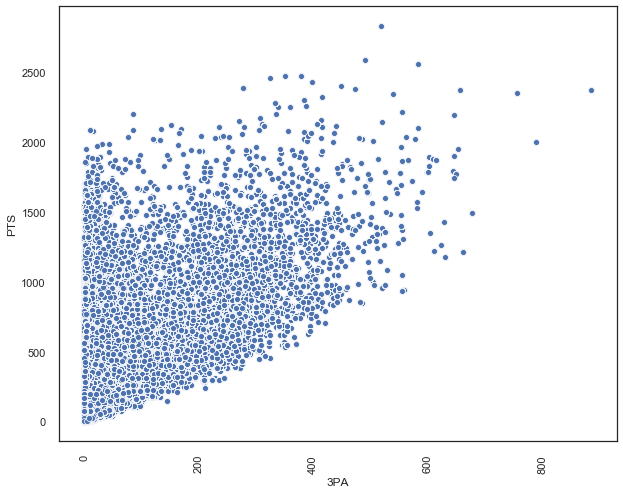

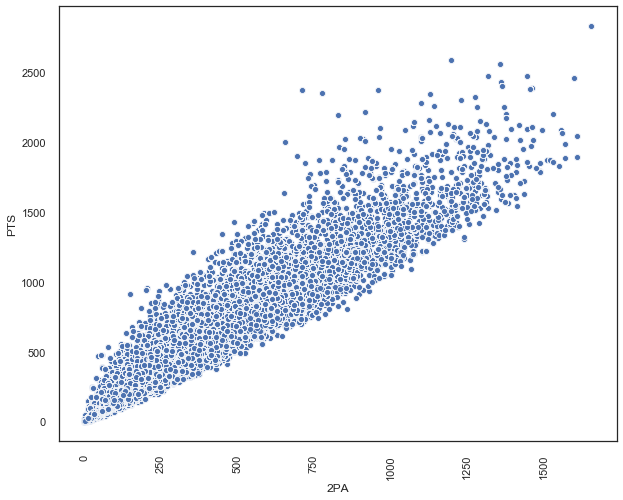

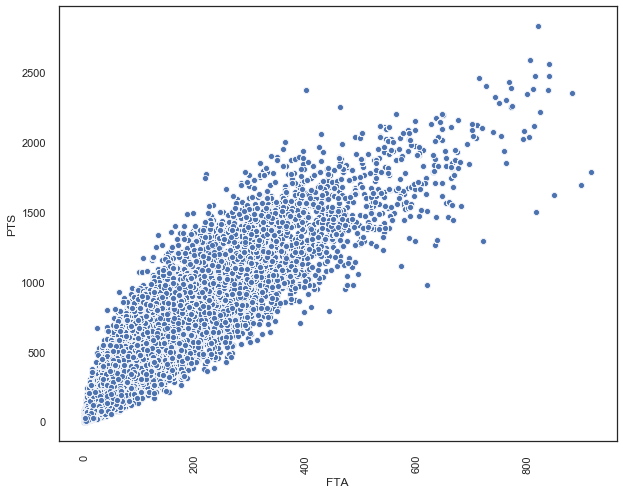

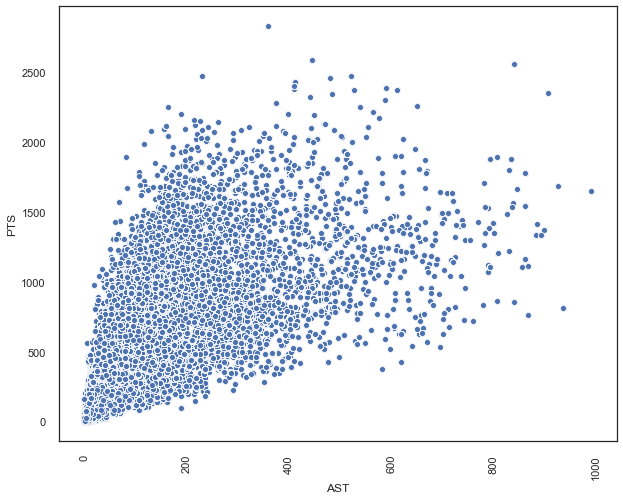

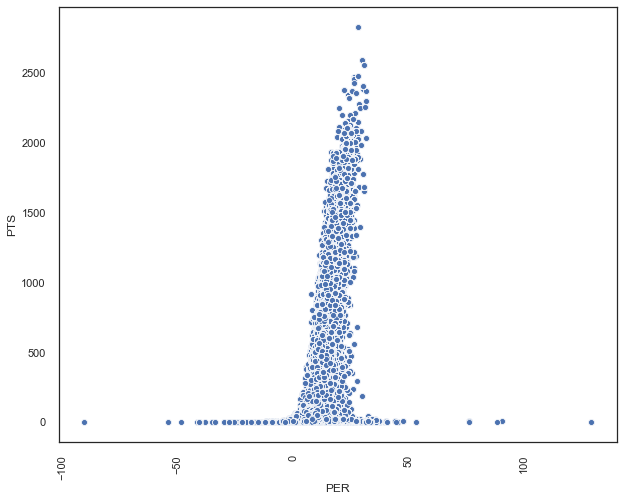

In [44]:
scattering, names = plt.subplots(figsize=(10, 8))
regress = sns.scatterplot(x='3PA', y='PTS', data=bball2)
plt.xticks(rotation=90)
scattering, names = plt.subplots(figsize=(10, 8))
regress = sns.scatterplot(x='2PA', y='PTS', data=bball2)
plt.xticks(rotation=90)
scattering = plt.gcf();
scattering, names = plt.subplots(figsize=(10, 8))
regress = sns.scatterplot(x='FTA', y='PTS', data=bball2)
plt.xticks(rotation=90)
scattering = plt.gcf();
scattering, names = plt.subplots(figsize=(10, 8))
regress = sns.scatterplot(x='AST', y='PTS', data=bball2)
plt.xticks(rotation=90)
scattering = plt.gcf();
scattering, names = plt.subplots(figsize=(10, 8))
regress = sns.scatterplot(x='PER', y='PTS', data=bball2)
plt.xticks(rotation=90)
scattering = plt.gcf();

In [45]:
bball2['PER'].describe()

count    109714.000000
mean         13.431033
std           5.454775
min         -90.600000
25%          10.600000
50%          13.500000
75%          16.300000
max         129.100000
Name: PER, dtype: float64

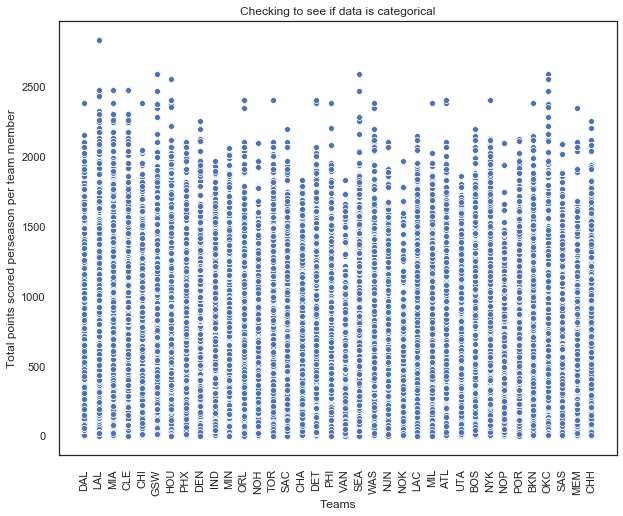

In [46]:
scattering, names = plt.subplots(figsize=(10, 8))
regress = sns.scatterplot(x='team_abbreviation', y='PTS', data=bball2)
plt.xticks(rotation=90)
names.set(xlabel='Teams', ylabel='Total points scored perseason per team member', title='Checking to see if data is categorical')

scattering = plt.gcf();

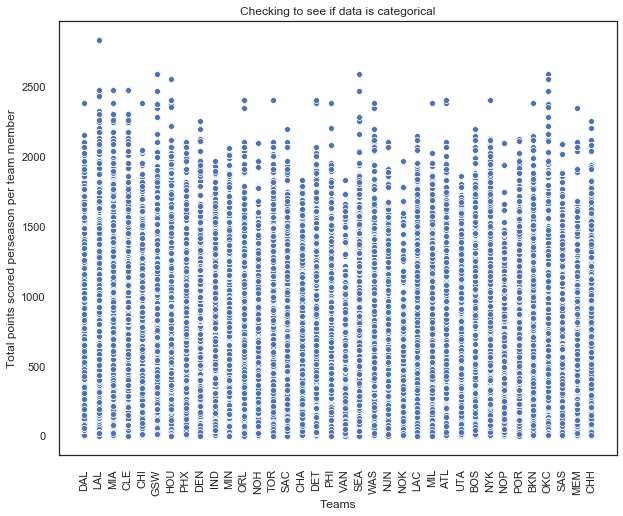

In [47]:
scattering, names = plt.subplots(figsize=(10, 8))
regress = sns.scatterplot(x='team_abbreviation', y='PTS', data=bball2)
plt.xticks(rotation=90)
names.set(xlabel='Teams', ylabel='Total points scored perseason per team member', title='Checking to see if data is categorical')

scattering = plt.gcf();

[Text(0.5, 1, 'Correlations of Components of Movies Greater Than or Equal to $90 Million Budget')]

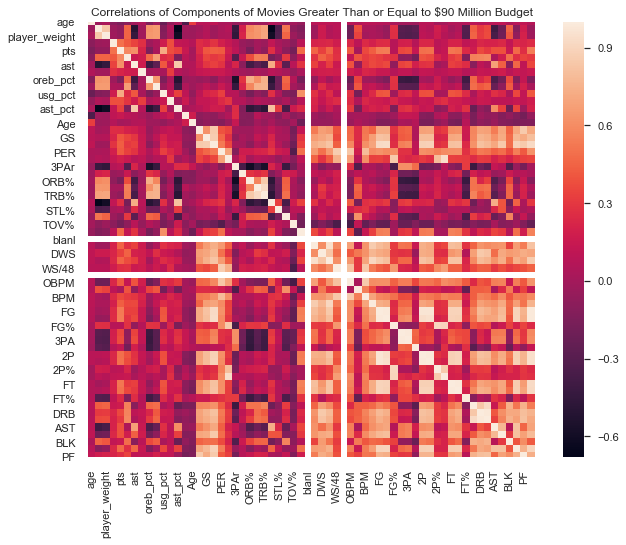

In [48]:
data= bball2
fmapping, heatmapping = plt.subplots(figsize=(10, 8))
heatmapping= sns.heatmap(data.corr(), square=False)
heatmapping.set(title='Correlations of Components of Movies Greater Than or Equal to $90 Million Budget')

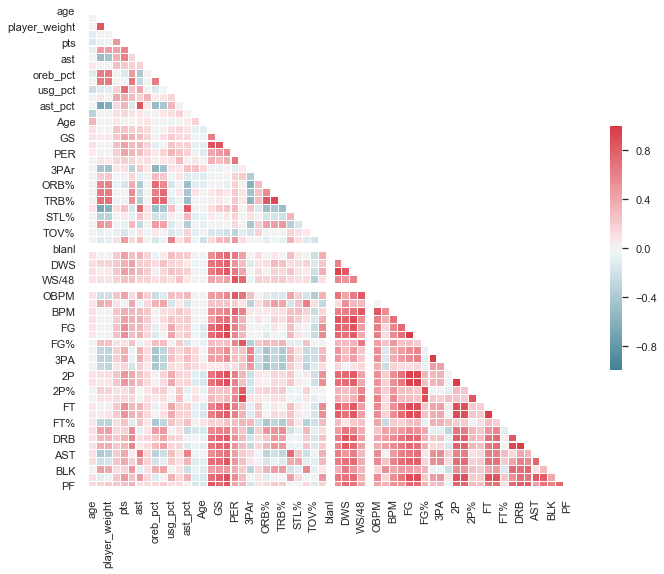

In [49]:
sns.set(style="white")
corr = bball2.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,vmin=-1, center=0,
            square=True, linewidths=.1, cbar_kws={"shrink": .5})

[Text(0.5, 1, 'Correlations of Components of Movies Greater Than or Equal to $90 Million Budget')]

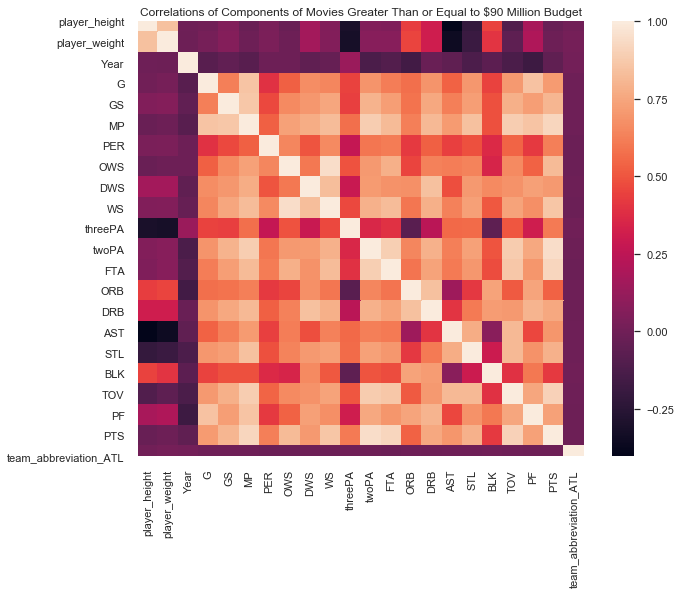

In [50]:
data= bball_corr
fmapping, heatmapping = plt.subplots(figsize=(10, 8))
heatmapping= sns.heatmap(data.corr(), square=False)
heatmapping.set(title='Correlations of Components of Movies Greater Than or Equal to $90 Million Budget')

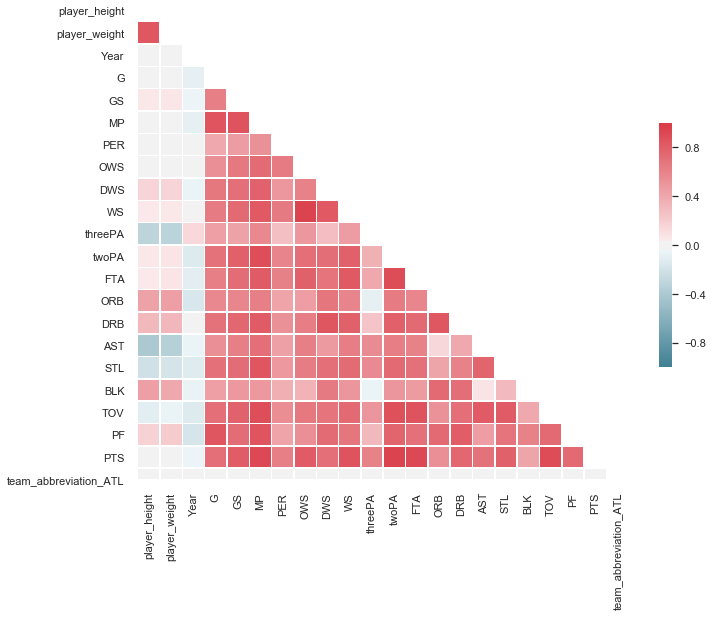

In [51]:
sns.set(style="white")
corr = bball_corr.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

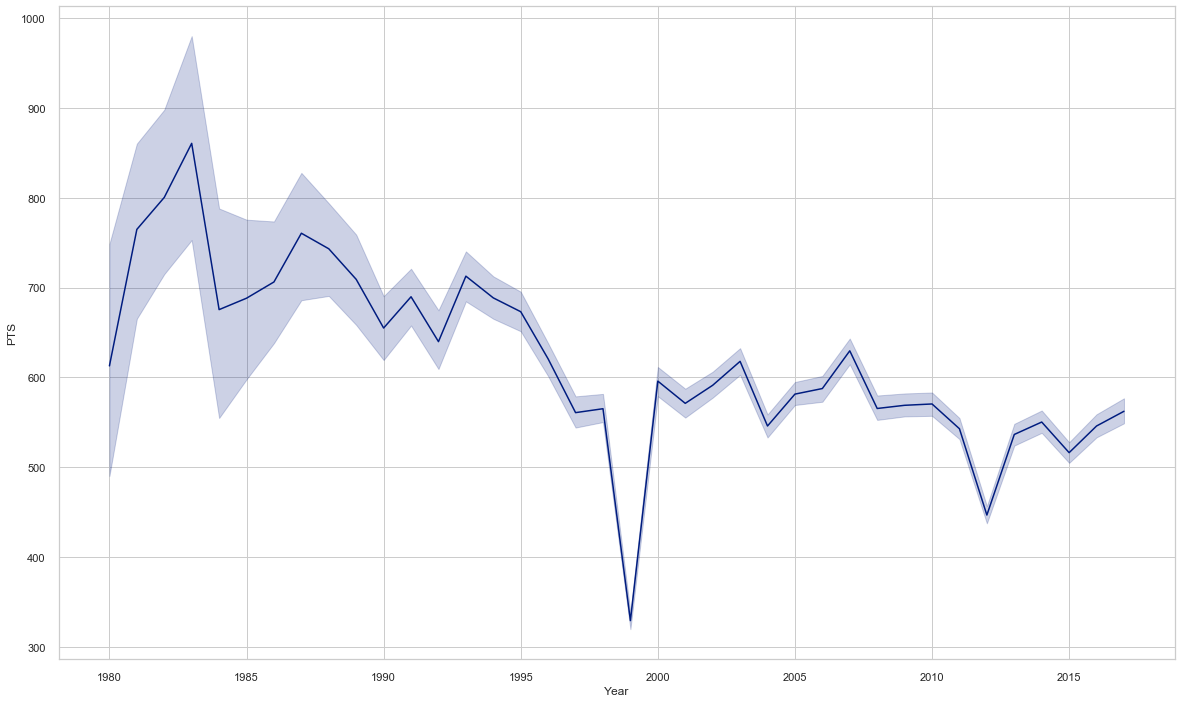

In [52]:

sns.set()
sns.set(style="whitegrid",palette="dark")
fizer, line = plt.subplots(figsize=(20, 12))
sns.lineplot(x="Year", y="PTS", data=bball, palette='GnBu_d')
#line.set(xlabel='Year', ylabel='Combined Worldwide Box Office in Tens of Billions', title='Combined Worldwide Box Office Yearly')

In [53]:
bball2[bball2['age']==44]

,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,Year,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Kevin Willis,DAL,44.0,213.36,111.13004,Michigan State,USA,1984,1,11,5,2.4,1.6,0.2,11.9,0.063,0.222,0.184,0.432,0.034,2006,1985.0,PF,22.0,ATL,82.0,19.0,1785.0,12.9,0.497,0.013,0.262,11.0,20.9,16.0,2.9,0.8,1.5,11.9,20.2,NaN,0.4,2.2,2.7,0.072,NaN,-2.9,-1.4,-4.4,-1.1,322.0,690.0,0.467,2.0,9.0,0.222,320.0,681.0,0.470,0.468,119.0,181.0,0.657,177.0,345.0,522.0,36.0,31.0,49.0,104.0,226.0,765.0
Kevin Willis,DAL,44.0,213.36,111.13004,Michigan State,USA,1984,1,11,5,2.4,1.6,0.2,11.9,0.063,0.222,0.184,0.432,0.034,2006,1986.0,PF,23.0,ATL,82.0,59.0,2300.0,14.1,0.545,0.007,0.324,11.7,22.0,16.9,2.8,1.4,1.1,16.0,19.6,NaN,1.4,3.3,4.7,0.099,NaN,-1.2,-0.1,-1.4,0.4,419.0,811.0,0.517,0.0,6.0,0.000,419.0,805.0,0.520,0.517,172.0,263.0,0.654,243.0,461.0,704.0,45.0,66.0,44.0,177.0,294.0,1010.0
Kevin Willis,DAL,44.0,213.36,111.13004,Michigan State,USA,1984,1,11,5,2.4,1.6,0.2,11.9,0.063,0.222,0.184,0.432,0.034,2006,1987.0,PF,24.0,ATL,81.0,81.0,2626.0,17.4,0.570,0.004,0.319,13.3,21.6,17.5,3.5,1.2,1.4,13.1,20.6,NaN,4.4,4.2,8.6,0.156,NaN,1.1,0.3,1.4,2.2,538.0,1003.0,0.536,1.0,4.0,0.250,537.0,999.0,0.538,0.537,227.0,320.0,0.709,321.0,528.0,849.0,62.0,65.0,61.0,173.0,313.0,1304.0
Kevin Willis,DAL,44.0,213.36,111.13004,Michigan State,USA,1984,1,11,5,2.4,1.6,0.2,11.9,0.063,0.222,0.184,0.432,0.034,2006,1988.0,PF,25.0,ATL,75.0,55.0,2091.0,14.0,0.548,0.003,0.357,12.4,16.7,14.5,1.9,1.6,1.2,14.8,18.8,NaN,1.7,2.5,4.2,0.095,NaN,-0.6,-0.6,-1.2,0.4,356.0,687.0,0.518,0.0,2.0,0.000,356.0,685.0,0.520,0.518,159.0,245.0,0.649,235.0,312.0,547.0,28.0,68.0,41.0,138.0,240.0,871.0
Kevin Willis,DAL,44.0,213.36,111.13004,Michigan State,USA,1984,1,11,5,2.4,1.6,0.2,11.9,0.063,0.222,0.184,0.432,0.034,2006,1990.0,PF,27.0,ATL,81.0,51.0,2273.0,15.7,0.551,0.009,0.306,12.5,20.4,16.4,3.7,1.4,1.3,13.6,19.5,NaN,3.0,1.7,4.7,0.098,NaN,0.1,-1.3,-1.2,0.5,418.0,805.0,0.519,2.0,7.0,0.286,416.0,798.0,0.521,0.520,168.0,246.0,0.683,253.0,392.0,645.0,57.0,63.0,47.0,144.0,259.0,1006.0
Kevin Willis,DAL,44.0,213.36,111.13004,Michigan State,USA,1984,1,11,5,2.4,1.6,0.2,11.9,0.063,0.222,0.184,0.432,0.034,2006,1991.0,PF,28.0,ATL,80.0,80.0,2373.0,15.3,0.533,0.011,0.270,11.5,21.2,16.2,6.3,1.2,1.0,13.4,19.8,NaN,2.3,2.0,4.4,0.089,NaN,-0.6,-0.6,-1.1,0.5,444.0,881.0,0.504,4.0,10.0,0.400,440.0,871.0,0.505,0.506,159.0,238.0,0.668,259.0,445.0,704.0,99.0,60.0,40.0,153.0,235.0,1051.0
Kevin Willis,DAL,44.0,213.36,111.13004,Michigan State,USA,1984,1,11,5,2.4,1.6,0.2,11.9,0.063,0.222,0.184,0.432,0.034,2006,1992.0,PF,29.0,ATL,81.0,80.0,2962.0,19.7,0.535,0.030,0.297,14.7,30.9,22.6,8.6,1.2,1.1,12.5,22.0,NaN,4.7,4.1,8.8,0.143,NaN,0.6,0.4,1.0,2.2,591.0,1224.0,0.483,6.0,37.0,0.162,585.0,1187.0,0.493,0.485,292.0,363.0,0.804,418.0,840.0,1258.0,173.0,72.0,54.0,197.0,223.0,1480.0
Kevin Willis,DAL,44.0,213.36,111.13004,Michigan State,USA,1984,1,11,5,2.4,1.6,0.2,11.9,0.063,0.222,0.184,0.432,0.034,2006,1993.0,PF,30.0,ATL,80.0,80.0,2878.0,17.4,0.531,0.024,0.246,12.5,27.9,19.9,8.9,1.2,0.9,13.6,22.5,NaN,3.0,3.0,6.0,0.099,NaN,-0.3,-0.1,-0.4,1.2,616.0,1218.0,0.506,7.0,29.0,0.241,609.0,1189.0,0.512,0.509,196.0,300.0,0.653,335.0,693.0,1028.0,165.0,68.0,41.0,213.0,264.0,1435.0
Kevin Willis,DAL,44.0,213.36,111.13004,Michigan State,USA,1984,1,11,5,2.4,1.6,0.2,11.9,0.063,0.222,0.184,0.432,0.034,2006,1994.0,PF,31.0,ATL,80.0,80.0,2867.0,19.4,0.538,0.019,0.299,12.8,24.2,18.5,8.7,1.4,0.9,11.7,24.1,NaN,5.1,5.1,10.2,0.170,NaN,0.8,0.3,1.1,2.2,627.0,1257.0,0.499,9.0,24.0,0.375,618.0,1233.0,0.501,0.502,268.0,376.0,0.713,335.0,628.0,963.0,150.0,79.0,38.0,188.0,250.0,1531.0
Kevin Willis,DAL,44.0,213.36,111.13004,Michigan State,USA,1984,1,11,5,2.4,1.6,0.2,11.9,0.063,0.222,0.1

In [54]:
teams = bball.columns[22:58]

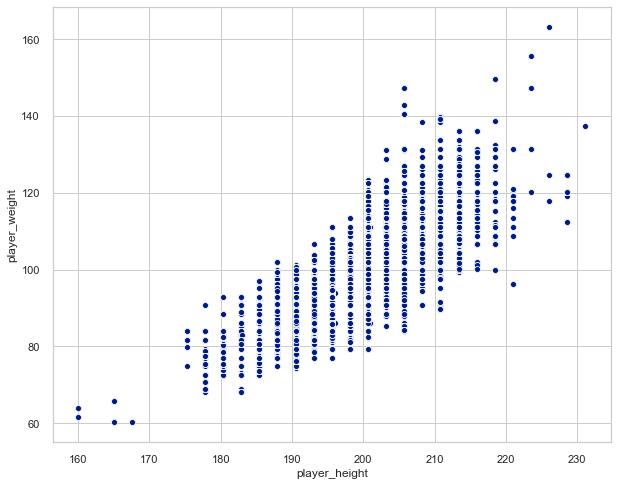

In [55]:
scattering, names = plt.subplots(figsize=(10, 8))
regress = sns.scatterplot(x='player_height', y='player_weight', data=bball)
scattering = plt.gcf();

In [56]:
bball2

,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,Year,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
A.C. Green,DAL,33.0,205.74,102.05820,Oregon State,USA,1985,1,23,83,7.2,7.9,0.8,-8.0,0.100,0.207,0.119,0.523,0.045,1996,1986.0,PF,22.0,LAL,82.0,1.0,1542.0,11.8,0.564,0.015,0.430,12.4,15.5,14.0,4.2,1.5,1.7,17.7,14.7,NaN,1.4,2.0,3.3,0.103,NaN,-0.5,0.8,0.3,0.9,209.0,388.0,0.539,1.0,6.0,0.167,208.0,382.0,0.545,0.540,102.0,167.0,0.611,160.0,221.0,381.0,54.0,49.0,49.0,99.0,229.0,521.0
A.C. Green,DAL,33.0,205.74,102.05820,Oregon State,USA,1985,1,23,83,7.2,7.9,0.8,-8.0,0.100,0.207,0.119,0.523,0.045,1996,1987.0,PF,23.0,LAL,79.0,72.0,2240.0,15.7,0.599,0.009,0.480,11.2,18.8,15.3,4.6,1.5,2.0,12.5,14.7,NaN,4.3,3.3,7.6,0.163,NaN,0.6,1.0,1.7,2.1,316.0,587.0,0.538,0.0,5.0,0.000,316.0,582.0,0.543,0.538,220.0,282.0,0.780,210.0,405.0,615.0,84.0,70.0,80.0,102.0,171.0,852.0
A.C. Green,DAL,33.0,205.74,102.05820,Oregon State,USA,1985,1,23,83,7.2,7.9,0.8,-8.0,0.100,0.207,0.119,0.523,0.045,1996,1988.0,PF,24.0,LAL,82.0,64.0,2636.0,14.5,0.581,0.003,0.592,11.1,19.1,15.3,4.5,1.6,1.0,12.9,14.7,NaN,4.5,3.4,7.9,0.144,NaN,0.2,0.8,1.0,2.0,322.0,640.0,0.503,0.0,2.0,0.000,322.0,638.0,0.505,0.503,293.0,379.0,0.773,245.0,465.0,710.0,93.0,87.0,45.0,120.0,204.0,937.0
A.C. Green,DAL,33.0,205.74,102.05820,Oregon State,USA,1985,1,23,83,7.2,7.9,0.8,-8.0,0.100,0.207,0.119,0.523,0.045,1996,1989.0,PF,25.0,LAL,82.0,82.0,2510.0,17.8,0.594,0.022,0.474,12.3,20.0,16.4,5.5,1.8,1.2,11.5,17.0,NaN,5.8,3.5,9.4,0.179,NaN,1.6,0.6,2.2,2.7,401.0,758.0,0.529,4.0,17.0,0.235,397.0,741.0,0.536,0.532,282.0,359.0,0.786,258.0,481.0,739.0,103.0,94.0,55.0,119.0,172.0,1088.0
A.C. Green,DAL,33.0,205.74,102.05820,Oregon State,USA,1985,1,23,83,7.2,7.9,0.8,-8.0,0.100,0.207,0.119,0.523,0.045,1996,1990.0,PF,26.0,LAL,82.0,82.0,2709.0,14.7,0.548,0.057,0.459,11.5,18.4,15.1,4.6,1.2,1.1,10.7,17.1,NaN,4.4,3.3,7.7,0.137,NaN,0.3,0.0,0.4,1.6,385.0,806.0,0.478,13.0,46.0,0.283,372.0,760.0,0.489,0.486,278.0,370.0,0.751,262.0,450.0,712.0,90.0,66.0,50.0,116.0,207.0,1061.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zydrunas Ilgauskas,MIA,36.0,220.98,117.93392,None,Lithuania,1996,1,20,72,5.0,4.0,0.4,9.4,0.119,0.178,0.159,0.531,0.033,2010,2008.0,C,32.0,CLE,73.0,73.0,2222.0,18.7,0.522,0.001,0.276,13.1,22.2,17.5,8.5,0.8,4.3,12.0,22.9,NaN,2.9,3.2,6.1,0.131,NaN,-1.3,1.2,-0.1,1.1,417.0,879.0,0.474,0.0,1.0,0.000,417.0,878.0,0.475,0.474,195.0,243.0,0.802,263.0,419.0,682.0,104.0,34.0,120.0,135.0,247.0,1029.0
Zydrunas Ilgauskas,MIA,36.0,220.98,117.93392,None,Lithuania,1996,1,20,72,5.0,4.0,0.4,9.4,0.119,0.178,0.159,0.531,0.033,2010,2009.0,C,33.0,CLE,65.0,65.0,1765.0,18.0,0.523,0.054,0.240,11.0,21.6,16.5,6.4,0.9,3.8,10.1,23.8,NaN,2.1,3.5,5.6,0.151,NaN,-1.9,1.0,-0.9,0.5,342.0,724.0,0.472,15.0,39.0,0.385,327.0,685.0,0.477,0.483,139.0,174.0,0.799,157.0,333.0,490.0,64.0,28.0,84.0,90.0,183.0,838.0
Zydrunas Ilgauskas,MIA,36.0,220.98,117.93392,None,Lithuania,1996,1,20,72,5.0,4.0,0.4,9.4,0.119,0.178,0.159,0.531,0.033,2010,2010.0,C,34.0,CLE,64.0,6.0,1339.0,11.9,0.491,0.053,0.231,10.7,19.6,15.3,5.6,0.5,2.9,11.6,19.0,NaN,0.5,2.0,2.5,0.088,NaN,-3.3,0.2,-3.2,-0.4,194.0,438.0,0.443,11.0,23.0,0.478,183.0,415.0,0.441,0.455,75.0,101.0,0.743,114.0,231.0,345.0,48.0,14.0,50.0,63.0,183.0,474.0
Zydrunas Ilgauskas,MIA,36.0,220.98,117.93392,None,Lithuania,1996,1,20,72,5.0,4.0,0.4,9.4,0.119,0.178,0.159,0.531,0.033,2010,2011.0,C,35.0,MIA,72.0,51.0,1145.0,12.8,0.531,0.003,0.144,11.9,17.5,14.9,3.6,1.1,4.0,13.3,16.0,NaN,1.0,1.9,2.9,0.1

In [57]:
bball

,player_height,player_weight,Year,G,GS,MP,PER,OWS,DWS,WS,threePA,twoPA,FTA,ORB,DRB,AST,STL,BLK,TOV,PF,PTS,team_abbreviation_ATL,team_abbreviation_BKN,team_abbreviation_BOS,team_abbreviation_CHA,team_abbreviation_CHH,team_abbreviation_CHI,team_abbreviation_CLE,team_abbreviation_DAL,team_abbreviation_DEN,team_abbreviation_DET,team_abbreviation_GSW,team_abbreviation_HOU,team_abbreviation_IND,team_abbreviation_LAC,team_abbreviation_LAL,team_abbreviation_MEM,team_abbreviation_MIA,team_abbreviation_MIL,team_abbreviation_MIN,team_abbreviation_NJN,team_abbreviation_NOH,team_abbreviation_NOK,team_abbreviation_NOP,team_abbreviation_NYK,team_abbreviation_OKC,team_abbreviation_ORL,team_abbreviation_PHI,team_abbreviation_PHX,team_abbreviation_POR,team_abbreviation_SAC,team_abbreviation_SAS,team_abbreviation_SEA,team_abbreviation_TOR,team_abbreviation_UTA,team_abbreviation_VAN,team_abbreviation_WAS,Pos_C,Pos_C-PF,Pos_C-SF,Pos_PF,Pos_PF-C,Pos_PF-SF,Pos_PG,Pos_PG-SF,Pos_PG-SG,Pos_SF,Pos_SF-PF,Pos_SF-PG,Pos_SF-SG,Pos_SG,Pos_SG-PF,Pos_SG-PG,Pos_SG-SF,draft_round_eight,draft_round_four,draft_round_one,draft_round_seven,draft_round_six,draft_round_three,draft_round_two,draft_round_zero
0,205.74,102.05820,1986.0,82.0,1.0,1542.0,11.8,1.4,2.0,3.3,6.0,382.0,167.0,160.0,221.0,54.0,49.0,49.0,99.0,229.0,521.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,205.74,102.05820,1987.0,79.0,72.0,2240.0,15.7,4.3,3.3,7.6,5.0,582.0,282.0,210.0,405.0,84.0,70.0,80.0,102.0,171.0,852.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,205.74,102.05820,1988.0,82.0,64.0,2636.0,14.5,4.5,3.4,7.9,2.0,638.0,379.0,245.0,465.0,93.0,87.0,45.0,120.0,204.0,937.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,205.74,102.05820,1989.0,82.0,82.0,2510.0,17.8,5.8,3.5,9.4,17.0,741.0,359.0,258.0,481.0,103.0,94.0,55.0,119.0,172.0,1088.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,205.74,102.05820,1990.0,82.0,82.0,2709.0,14.7,4.4,3.3,7.7,46.0,760.0,370.0,262.0,450.0,90.0,66.0,50.0,116.0,207.0,1061.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109720,220.98,117.93392,2007.0,78.0,78.0,2130.0,18.0,2.6,4.0,6.6,1.0,792.0,192.0,242.0,357.0,123.0,48.0,98.0,141.0,257.0,925.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
109721,220.98,117.93392,2008.0,73.0,73.0,2222.0,18.7,2.9,3.2,6.1,1.0,878.0,243.0,263.0,419.0,104.0,34.0,120.0,135.0,247.0,1029.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
109722,220.98,117.93392,2009.0,65.0,65.0,1765.0,18.0,2.1,3.5,5.6,39.0,685.0,174.0,157.0,333.0,64.0,28.0,84.0,90.0,183.0,838.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
109723,220.98,117.93392,2010.0,64.0,6.0,1339.0,11.9,0.5,2.0,2.5,23.0,415.0,101.0,114.0,231.0,48.0,14.0,50.0,63.0,183.0,474.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
